# Analysis of Dynamic Systems

## Goals of this course

- **Introduce the concepts of feedback, regulation and/or control**, and some skills useful in practice.
- **To present modeling tools of linear dynamical systems invariant over time**, and the working environment of the course!!!
- **To present the behavior of systems of first order and second order**
- **To determine the stability of linear and nonlinear dynamic systems**
- **To determine the temporal response of dynamic systems**
- **Evaluate the dynamic effects of introducing different factors that influence a system**

## Schedule:

- Getting started
- Introduction
- Mathematical bases
- Bode diagrams
- Modeling with linear elements
- State variables
- Block diagrams
- Time response
- Frequency response
- Stability
- Root Locus
- Final project
- Course evaluation

In [1]:
# Run this only in Colab
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
colab_path = '/content/drive/My Drive/Colab Notebooks/dynamic-ud/notebooks/img/'
my_path = 'img/'
valid_path = colab_path # Use one of them depending on the platform

## Getting started

### Python and Jupyter Notebook

Spun-off from **IPython** in 2014 by Fernando Pérez, Project Jupyter supports execution environments in several dozen languages. Project Jupyter's name is a reference to the three core programming languages supported by Jupyter, which are **Julia, Python, R, MatLab, Octave, C++, and C#** among others, and also a homage to Galileo's notebooks recording the discovery of the moons of Jupiter. Project Jupyter has developed and supported the interactive computing products Jupyter Notebook, JupyterHub, and JupyterLab, the next-generation version of Jupyter Notebook.

#### Installing Python 3 on Windows

You have to set the working environment:
- Install Python (https://www.python.org/downloads/windows/)
- Install Jupyter Notebook, the shell (http://jupyter.org/)

<code>
    pip3 install notebook
</code>

The simplest way to configure the work environment is to install Anaconda (www.anaconda.com).

#### Installing Python 3 on Linux and Mac

Most likely Python is already installed on Linux, at least version 2. If version 3 is not installed, in the shell:

<code>
    uname -m
    sudo apt-get install python3
    sudo apt-get install python3-pip
    pip install notebook
    pip3 install jupyter
</code>

And on Mac:

https://www.python.org/downloads/mac-osx/

<code>
    pip3 install notebook
</code>

#### Jupyter Notebook

The Jupyter Notebook is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and narrative text. This intuitive workflow promotes iterative and rapid development, making notebooks an increasingly popular choice at the heart of contemporary data science, analysis, and increasingly science at large.

On Windows, you can run Jupyter via the shortcut Anaconda adds to your start menu, which will open a new tab in your default web browser.

This isn’t a notebook just yet, but don’t panic! There’s not much to it. This is the Notebook Dashboard, specifically designed for managing your Jupyter Notebooks. Think of it as the launchpad for exploring, editing and creating your notebooks.

Be aware that the dashboard will give you access only to the files and sub-folders contained within Jupyter’s start-up directory; however, the start-up directory can be changed. It is also possible to start the dashboard on any system via the command prompt (or terminal on Unix systems) by entering the command:

<code>
    jupyter notebook
</code>

in this case, the current working directory will be the start-up directory.

You may have noticed that the URL for the dashboard is something like http://localhost:8888/tree. Localhost is not a website, but indicates that the content is being served from your local machine: your own computer. Jupyter’s Notebooks and dashboard are web apps, and Jupyter starts up a local Python server to serve these apps to your web browser, making it essentially platform independent and opening the door to easier sharing on the web.

Each *.ipynb* file is a text file that describes the contents of your notebook in a format called JSON. Each cell and its contents, including image attachments that have been converted into strings of text, is listed therein along with some metadata. You can edit this yourself — if you know what you are doing! — by selecting “Edit > Edit Notebook Metadata” from the menu bar in the notebook.

You can also view the contents of your notebook files by selecting *Edit* from the controls on the dashboard, but the keyword here is *can*; there’s no reason other than curiosity to do so unless you really know what you are doing.

Jupyter is essentially just an advanced word processor. Why not take a look around? Check out the menus to get a feel for it, especially take a few moments to scroll down the list of commands in the command palette, which is the small button with the keyboard icon (or *Ctrl + Shift + P*).

There are two fairly prominent terms that you should notice, which are probably new to you: *cells* and *kernels* are key both to understanding Jupyter and to what makes it more than just a word processor. Fortunately, these concepts are not difficult to understand.

 - A kernel is a *computational engine* that executes the code contained in a notebook document.
 - A cell is a container for text to be displayed in the notebook or code to be executed by the notebook’s kernel.

Cells form the body of a notebook. In the screenshot of a new notebook in the section above, that box with the green outline is an empty cell. There are two main cell types that we will cover:

 - A code cell contains code to be executed in the kernel and displays its output below.
 - A Markdown cell contains text formatted using Markdown and displays its output in-place when it is run.

#### Google Colab (Colaboratory)

https://colab.research.google.com

Colab's notebooks are Jupyter's notebooks hosted by Colab. They allow you to combine executable code and rich text in the same document, as well as images, HTML, LaTeX and more. The notebooks you create in Colab are stored in your Google Drive account. You can easily share your Colab notebooks with colleagues or friends, allowing them to comment on or even edit them.

### Intro to using Sympy

Observe and execute the following code:

In [0]:
# Run this only in Colab
# Rendering SymPy equations in Colab requires the MathJax javascript library
from IPython.display import Math, HTML

def load_mathjax_in_cell_output():
  display(HTML("<script src='https://www.gstatic.com/external_hosted/"
               "mathjax/latest/MathJax.js?config=default'></script>"))
get_ipython().events.register('pre_run_cell', load_mathjax_in_cell_output)

In [4]:
import sympy
from sympy import *
sympy.init_printing()
s = Symbol('s')

With this it is now possible to define transfer functions, for example:

In [5]:
G1 = 1/(s+1)

Unlike Matlab, nothing is presented here if we do not explicitly ask for it, for example:

In [6]:
G1

Let's look at another example:

In [7]:
G2 = (10*s)/(s+10)

In [8]:
G2

In [9]:
G = G1*G2

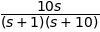

In [10]:
G

We can expand the bottom using the .expand() method:

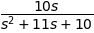

In [11]:
G.expand()

As an annotation: G.expand() = expand(G)

And factorize it again with the .factor() method:

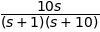

In [13]:
Out[11].factor()

We can do something more complex like:

In [14]:
G = 0.30*(s+0.05)*(s**2+1600.0)/((s**2+0.05*s+16.0)*(s+70.0))

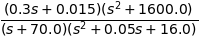

In [15]:
G

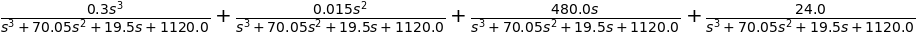

In [16]:
G.expand()

Which is really nice because it does all the multiplication for us... and it’s much prettier than Matlab!

**Note:** Use floats (number including a decimal) for all values you insert! 